# 자연어 처리

# 1. 토크나이징

## 1) KoNLPy

* `pos()`: (토큰, 품사)의 쌍으로 출력
* `morphs()`: 토큰들만 출력
* `nouns()`: 명사들만 출력

In [ ]:
from konlpy.tag import Okt

okt = Okt()

review = "분명 배달이 완료되었는데 나는 받지 않았엌ㅋㅋㅋ"
result = okt.pos(review) # pos(norm, stem), morphs, nouns

# for res in result:
#     print(res)

print(okt.pos(review))
print(okt.pos(review, stem=True))
print(okt.pos(review, norm=True))
print(okt.morphs(review))
print(okt.nouns(review))

## 2) Kiwi

In [ ]:
from kiwipiepy import Kiwi

kiwi = Kiwi()
review = "분명 배달이 완료되었는데 나는 받지 않았엌ㅋㅋㅋ"
result = kiwi.tokenize(review)

print(result)
print(result[0])

for res in result:
    word = res.form
    pos = res.tag
    print(word, pos)
    if pos[0] == "N":
        print(word)

    break

# 2. 빈도 분석



```
# 코드로 형식 지정됨
```

* 목표: 어떤 단어가 많이 등장하는가? 의미 있는 단어가 무엇일까?

## 1) 데이터 불러오기

In [ ]:
import pandas as pd
data = pd.read_csv("data/appreply.csv", index_col=0).dropna().reset_index(drop=True)
data.head()

In [ ]:
data.to_csv("data/appreply2.csv")

In [ ]:
# 저장한 데이터 다시 불러오기
data = pd.read_csv("data/appreply2.csv", index_col=0)
data.head()

## 2) 데이터 전처리

In [ ]:
from konlpy.tag import Okt

okt = Okt()

In [ ]:
# 정규표현식으로 전처리하기
text = "오늘!!!!!!!!!!!!!!!!!!!!!!!!!!! ㅇㅇ ㅏㅏㅛ hello HELLO 010-5796-8426 기분 좋아^^ ㅎㅇ"

import re
# new_text = re.sub("[^ㄱ-ㅎ]", "", text) # 한글 자음만 출력해주세요
# print(new_text)
new_text = re.sub("[^가-힣a-zA-Z0-9-\s]", "", text) # 한글 자음만 출력해주세요
print(new_text)

In [ ]:
# word_list라는 빈 리스트를 만든다.
# 모든 리뷰들을 형태소 분석기에 넣는다.
# 그 리뷰들 중에 Noun만 추출한다.
# 그 토큰들을 word_list에 담는다.
   # 조건: 2글자 이상인 단어만 담는다
   # 조건: 불용어(stopwords)가 아닌 단어들만 담는다.

word_list = []
stopwords = ["배민", "민족"]

for i, review in enumerate(data["text"].tolist()):
    # STEP1: 데이터 전처리
    new_review = re.sub("[^a-zA-Z가-힣\s]", "", review)
    # STEP2: 형태소 분석
    result = okt.nouns(new_review)
    # STEP3: 조건에 맞는 단어 담기
    for word in result:
        if len(word) > 1 and word not in stopwords:
            word_list.append(word)
    ### 출력 메세지 ###
    print(f"{i}번째 리뷰: {new_review}")
print(word_list)

## 3) 워드클라우드

In [ ]:
print(word_list)

In [ ]:
# 키:값 => 단어:빈도 수
from collections import Counter

counter = Counter(word_list)
print(counter)
print(counter.most_common(30))

In [ ]:
# (한번 해보기) Counter 없이 딕셔너리로 코딩해보기

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib

## (한번 해보기) Mask로 내가 원하는 모양으로 만들어보기
from PIL import Image
import numpy as np

image = Image.open("Images/image.png")
mask_img = np.array(image)

wc = WordCloud(
    font_path = "C:\Windodws\Fonts\malgunbd.ttf",
    mask=mask_img,
    background_color="white",
    width=800,
    height=400
)

## (한번 해보기) 가장 많이 발생한 50개만 워드 클라우드로 그려보기
wc.generate_from_frequencies(dict(counter.most_common(50)))

plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 워드 클라우드(단어)", fontsize=15)
plt.show()

## 4) 리뷰 검색

In [ ]:
data.head()

In [ ]:
keyword = "결제"

# 조건: data에 text열에서 keyword가 속해있어야 한다.
extract_data = data.loc[data["text"].str.contains(keyword),:]
extract_data

In [ ]:
for i, review in enumerate(extract_data["text"]):
    print(f"{i}번째 리뷰: {review}")
    print("="*100)

# 3. 긍부정 분석

## 1) 데이터 불러오기

In [ ]:
import pandas as pd
data = pd.read_csv("data/appreply2.csv", index_col=0)
data

In [ ]:
# (미션) reaction열을 만드는데 score가 4이상이면 긍정(1), 그 외는 부정(0)으로 나타내주세요
data["reaction"] = np.where(data["score"] >= 4, 1, 0)
data.head()

In [ ]:
data.to_csv("data/appreply3.csv")

In [ ]:
import pandas as pd

data = pd.read_csv("data/appreply3.csv", index_col=0)
data

## 2) 데이터 탐색

In [ ]:
# 긍부정 비율이 어떻게 되나요?
data["reaction"].value_counts()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

plt.figure(figsize=(5,3))
data["reaction"].value_counts().plot(kind="bar")
plt.title("긍부정 빈도 수")
plt.xticks(ticks=[0, 1], labels=["부정", "긍정"], rotation=0)
plt.show()

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(data=data, x="reaction")
plt.title("긍부정 빈도 수")
plt.xticks(ticks=[0, 1], labels=["부정", "긍정"], rotation=0)
plt.show()

In [ ]:
# reaction==1인 데이터 data_pos
# reaction==0인 데이터 data_neg
data_pos = data.loc[data["reaction"]==1, :]
print(data_pos.shape)
data_neg = data.loc[data["reaction"]==0, :]
print(data_neg.shape)

## 3) 데이터 전처리

In [ ]:
word_list = []
stopwords = ["배민", "민족"]

for i, review in enumerate(data["text"].tolist()):
    # STEP1: 데이터 전처리
    new_review = re.sub("[^a-zA-Z가-힣\s]", "", review)
    # STEP2: 형태소 분석
    result = okt.nouns(new_review)
    # STEP3: 조건에 맞는 단어 담기
    for word in result:
        if len(word) > 1 and word not in stopwords:
            word_list.append(word)
    ### 출력 메세지 ###
    print(f"{i}번째 리뷰: {new_review}")
print(word_list)

In [ ]:
def get_word_list(df, stopword_list):
    """리뷰 데이터프레임과 불용어 리스트를 입력하면 word_list를 반환해주는 함수"""
    word_list = []

    for i, review in enumerate(df["text"].tolist()):
        # STEP1: 데이터 전처리
        new_review = re.sub("[^a-zA-Z가-힣\s]", "", review)
        # STEP2: 형태소 분석
        result = okt.nouns(new_review)
        # STEP3: 조건에 맞는 단어 담기
        for word in result:
            if len(word) > 1 and word not in stopword_list:
                word_list.append(word)
        ### 출력 메세지 ###
        # print(f"{i}번째 리뷰: {new_review}")
    return word_list

In [ ]:
stopwords = ["배민", "민족"]

word_list_pos = get_word_list(data_pos, stopwords)
word_list_neg = get_word_list(data_neg, stopwords)

In [ ]:
print(word_list_pos)
print(word_list_neg)

## 4) 워드클라우드

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib
from PIL import Image
import numpy as np
from collections import Counter

def draw_wordcloud(word_list, top_n=None):
    """word_list를 받으면 Counter로 빈도 수를 센 후 워드 클라우드를 그리고 counter를 반환하는 함수"""
    counter = Counter(word_list)
    # print(counter)
    # print(counter.most_common(30))
    
    ## (한번 해보기) Mask로 내가 원하는 모양으로 만들어보기
    image = Image.open("Images/image.png")
    mask_img = np.array(image)

    wc = WordCloud(
        font_path = "C:\Windodws\Fonts\malgunbd.ttf",
        mask=mask_img,
        background_color="white",
        width=800,
        height=400
    )

    ## (한번 해보기) 가장 많이 발생한 50개만 워드 클라우드로 그려보기
    wc.generate_from_frequencies(counter)

    plt.figure(figsize=(5,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("배달의 민족 워드 클라우드(단어)", fontsize=15)
    plt.show()

    return counter

In [ ]:
result = draw_wordcloud(word_list_pos)
print(result)

In [ ]:
result = draw_wordcloud(word_list_neg)
print(result)

### + 함수 응용(most common 반영하기)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib
from PIL import Image
import numpy as np
from collections import Counter

def draw_wordcloud(word_list, top_n=None):
    """word_list를 받으면 Counter로 빈도 수를 센 후 워드 클라우드를 그리고 counter를 반환하는 함수"""
    counter = Counter(word_list)
    # print(counter)
    # print(counter.most_common(30))

    if top_n is not None:
        counter = dict(counter.most_common(top_n))

    ## (한번 해보기) Mask로 내가 원하는 모양으로 만들어보기
    image = Image.open("Images/image.png")
    mask_img = np.array(image)

    wc = WordCloud(
        font_path = "C:\Windodws\Fonts\malgunbd.ttf",
        mask=mask_img,
        background_color="white",
        width=800,
        height=400
    )

    ## (한번 해보기) 가장 많이 발생한 50개만 워드 클라우드로 그려보기
    wc.generate_from_frequencies(counter)

    plt.figure(figsize=(5,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("배달의 민족 워드 클라우드(단어)", fontsize=15)
    plt.show()

    return counter

In [ ]:
result = draw_wordcloud(word_list_pos, top_n=30)
print(result)

# 4. 장바구니 분석

## 1) 데이터 불러오기

In [ ]:
data = pd.read_csv("data/appreply2.csv", index_col=0)
data.head()

## 2) 데이터 전처리

In [ ]:
# word_list = [리뷰1 단어1, 리뷰1 단어2, 리뷰2 단어1, 리뷰2 단어2, 리뷰2 단어3 ......]

In [ ]:
# main_list = [[리뷰1 단어1 리뷰1 단어2], [리뷰2 단어1, 리뷰2 단어2, 리뷰3 단어3], ....]

In [ ]:
main_list = []
stopwords = ["배민", "민족"]

for i, review in enumerate(data["text"].tolist()):
    # STEP1: 데이터 전처리
    new_review = re.sub("[^a-zA-Z가-힣\s]", "", review)
    # STEP2: 형태소 분석
    result = okt.nouns(new_review)
    # STEP3: 조건에 맞는 단어 담기
    sub_list = []
    for word in result:
        if len(word) > 1 and word not in stopwords:
            sub_list.append(word)
    main_list.append(sub_list)
    ### 출력 메세지 ###
    print(f"{i}번째 리뷰: {new_review}")
print(main_list)

In [ ]:
print(main_list)
for i in main_list:
    print(i)

## 3) 연관성 분석

```
uv add mlxtend
```

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_arr = te.fit(main_list).transform(main_list)
te_arr

In [ ]:
df = pd.DataFrame(te_arr, columns=te.columns_)

df

In [ ]:
# 각 단어가 출현한 횟수
df.sum(axis=0)

In [ ]:
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True, max_len=2)
frequent_itemsets

* support: $P(A\cap B)$
* confidence: $P(B|A)=\dfrac{P(A\cap B)}{P(A)}$
* lift: $\dfrac{P(B|A)}{P(B)}$

lift 의 값이 높다는 것은   
B가 단돈으로 나올 확률보다 A가 있을때 B가 나올 확률이 더 높다는 것

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules[["antecedents", "consequents", "support", "confidence", "lift"]]

## 4) 시각화

In [ ]:
# (전화, 취소) => "전화,취소"   (주문, 배달) => "배달,주문"

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

rules["antecedents_str"] = rules["antecedents"].apply(lambda x: ",".join(sorted(list(x)))) # 질문: ,로 join 을 하는 이유는?
rules["consequents_str"] = rules["consequents"].apply(lambda x: ",".join(sorted(list(x))))

rules[["antecedents_str", "consequents_str", "support", "confidence", "lift"]]

In [ ]:
pivot_data = rules.pivot_table(
    index="antecedents_str",
    columns="consequents_str",
    values="lift",
    fill_value=0
)
pivot_data

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(pivot_data, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.3, square=True)
plt.title("연관성 분석 시각화(Lift 기준)")
plt.xlabel("Consequents")
plt.ylabel("Antecedents")
plt.show()

# 5. 네트워크 분석

```
uv add networkx
```

In [ ]:
rules.head()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 1. 그래프 생성
G = nx.Graph()

# 2. 엣지 추가
for _, row in rules.iterrows():
    # 단어 추출
    antecedent = ",".join(row["antecedents"])
    consequent = ",".join(row["consequents"])
    weight = row["lift"]

    # 노드 추가
    G.add_edge(antecedent, consequent, weight=weight)

In [ ]:
for temp in rules.iterrows():
    print(temp)

In [ ]:
G.edges()

In [ ]:
G["가게"]["기능"]

In [ ]:
# 3. 노드 배치
# pos = nx.kamada_kawai_layout(G)
pos = nx.spring_layout(G, seed=15)

# 4. 가중치 추출
edge_weights = [G[u][v]["weight"] for u, v in G.edges()]

# 5. 노드 스타일 지정 및 그리기
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=1000)
nx.draw_networkx_edges(G, pos, edge_color="gray", width=edge_weights)
nx.draw_networkx_labels(G, pos, font_size=12, font_family="Malgun Gothic")

# edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("단어 간 연관 규칙 기반 네트워크 그래프(Lift 기준)")
plt.axis("off")
plt.show()

# 6. 인코딩/벡터라이징

```
uv add scikit-learn
```

## 1) 인코딩

In [ ]:
sentences = [
    "나는 오늘 기분이 좋다",
    "오늘 날씨가 좋다",
    "나는 기분이 나쁘다"
]

### 정수 인코딩

In [ ]:
# sentences를 스페이스 기준으로 쪼갠다.
# 그 단어들의 집합을 만든다.
tokens = []

for sent in sentences:
    temp = sent.split()
    tokens.extend(temp)

print(tokens)
token_set = set(tokens)
print(token_set)

In [ ]:
from sklearn.preprocessing import LabelEncoder

print(f"입력값: {list(token_set)}")
label_encoder = LabelEncoder()
encoded = label_encoder.fit_transform(list(token_set))
print(f"출력값: {encoded}")
print(f"어떤 기준인가요? {label_encoder.classes_}")

In [ ]:
mydict = {}
for i, key in enumerate(label_encoder.classes_):
    mydict[str(key)] = i

mydict

In [ ]:
label_encoder.transform(["나는", "기분이", "나쁘다"])

### 원-핫 인코딩

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

tokens_numpy = np.array(list(token_set))
print(tokens_numpy)
print("="*50)

tokens_arr = tokens_numpy.reshape(-1, 1)
print(f"입력값:\n{tokens_arr}")
print("="*50)

oh_encoder = OneHotEncoder()
encoded = oh_encoder.fit_transform(tokens_arr)
print(f"출력값:\n{encoded.toarray()}")
print(f"어떤 기준인가요? {oh_encoder.categories_}")

In [ ]:
oh_encoder.categories_

## 2) 벡터라이징

### BoW(Bag of Words)

In [ ]:
sentences = [
    "나는 오늘 기분이 좋다",
    "오늘 날씨가 좋다",
    "나는 기분이 나쁘다",
    "집에 가고 싶다"
]

In [ ]:
# 미션: 딕셔너리 만들기(단어: 빈도, 형태의 딕셔너리 만들기)
mydict = {}
for sent in sentences:
    # 만약에 word가 mydict의 키에 있으면 +1을 하고, 아니면 word를 키로 만들어서 값을 1로 만든다.
    for word in sent.split():
        if word in mydict:
            mydict[word] += 1
        else:
            mydict[word] = 1
    print(mydict)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(sentences)
print(vectorizer.vocabulary_)
print(bow_matrix.toarray())

### TF-IDF

자연어 처리(NLP)에서 텍스트를 숫자 벡터로 바꾸는 방법 중 하나입니다.   
다른 벡터라이징 방식들과 비교해볼 때, **"각 단어가 문서에서 얼마나 중요한지를 수치화"**한다는 점이 핵심이에요.

count 를 기반으로 계산됨

TF (Term Frequency)
→ 문서 내 특정 단어가 얼마나 자주 나오는가?   
예: "apple apple orange" → apple의 TF는 2/3
   
IDF (Inverse Document Frequency)   
→ 여러 문서 중 얼마나 희귀한가?   
→ 많이 나오는 흔한 단어는 점수가 낮아짐   
   
TF × IDF = 최종 가중치 (중요도)   
→ 자주 나오면서도 희귀한 단어일수록 높은 점수를 받음   

In [ ]:
# 질문 : 이건 뭐하는 거임?
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sentences)
print(vectorizer.vocabulary_)
print(tfidf_matrix.toarray())

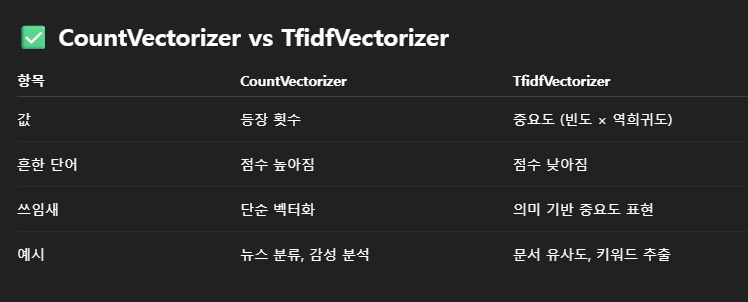

### 유사도 분석

In [ ]:
print(sentences)

In [ ]:
# 질문 : 각 열이 의미하는 것은?
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(tfidf_matrix)
print(similarity)

# ======== 구분선 ========

---

# 1. 토크나이징

In [ ]:
# 테스트 코드
from konlpy.tag import Kkma
from konlpy.utils import pprint

kkma = Kkma()
pprint(kkma.sentences(u'네, 안녕하세요. 반갑습니다.'))

In [ ]:
from konlpy.tag import Okt # Okt, Kkma

okt = Okt()

text = "분명 배달이 완료되었는데 나는 받지 않았어"
result = okt.pos(text)

for res in result:
    print(res)

In [ ]:
from konlpy.tag import Kkma # Okt, Kkma

kkma = Kkma()

text = "분명 배달이 완료되었는데 나는 받지 않았어"
result = kkma.pos(text)

for res in result:
    print(res)

In [ ]:
from konlpy.tag import Okt # Okt, Kkma

okt = Okt()

text = "분명 배달이 완료되었는데 나는 받지 않았어"
result1 = okt.pos(text) # pos, morphs, nouns
result2 = okt.morphs(text)
result3 = okt.nouns(text)

print(result1)
print(result2)
print(result3)

In [ ]:
text1 = "나는 밥을 먹었엌ㅋㅋㅋ"
text2 = "나는 밥을 먹었다"

result1 = okt.pos(text1)
result2 = okt.pos(text1, norm=True)
result3 = okt.pos(text2, stem=True)

print(result1)
print(result2)
print(result3)

## 1) 데이터 불러오기

In [ ]:
# 데이터 불러오기
# 미션1: 첫번째 데이터 댓글을 형태소 분석기로 쪼개보기
# 미션2: 처음부터 5개의 데이터 댓글을 추출해서 반복문으로 형태소 분석기로 쪼개보기
import pandas as pd

data = pd.read_csv("data/배달의민족댓글.csv", index_col=0)
data.head()

In [ ]:
# 방법1. 데이터를 인덱스 3부터 끝까지 가져오기
data1 = data.iloc[3:,:].reset_index(drop=True)
data1.head()

In [ ]:
# 방법2. 결측치 제거
data2 = data.dropna().reset_index(drop=True)
data2.head()

In [ ]:
# 데이터 저장하기
data1.to_csv("data/배달의민족댓글2.csv")

In [ ]:
# 데이터 불러오기
data = pd.read_csv("data/배달의민족댓글2.csv", index_col=0)
data

In [ ]:
# 첫번째 댓글 가져오기
review_one = data["댓글"][0]
print(review_one)

from konlpy.tag import Okt
okt = Okt()

result = okt.pos(review_one)
print(result)

In [ ]:
# 처음부터 다섯개의 댓글 가져오기
review_five = data["댓글"][:5]

for i, review in enumerate(review_five.tolist()):
    result = okt.pos(review)
    # print(result)
    temp_list = []
    for word, pos in result:
        if pos == "Noun":
            temp_list.append(word)
            # print(word, pos)
    print(f"{i}번째 Noun 형태소 분석기 결과:\n\t{temp_list}")

    # print(f"{i}번째 형태소 분석기 결과:\n\t{result}")

## 2) 데이터 전처리

In [ ]:
text = "오늘!!!!!!!!!!!!!!!!!! ㅇㅇ너무 ㅓㅣㅗ hello  HELLO 010-7894-5798   기분 좋아^^ ㅎㅇㅎㅇ"

import re
new_text = re.sub("[^0-9a-zA-Z가-힣ㄱ-ㅎㅏ-ㅣ-\s]", "", text)
# new_text = re.sub("[^0-9a-zA-Z가-힣\s+-]", "", text)
print(new_text)

In [ ]:
# 워드 클라우드
# 목표: 데이터의 모든 댓글에 대한 Noun 품사를 가진 단어들을 word_list에 담는 것
# 조건1: 전처리 과정(특수문자, 자음, 모음 없애기)
# 조건2: 불용어 제거(stopwords)
# 조건3: 한 글자인 단어는 포함하지 않는다.

word_list = []
stopwords = ["배민", "민족"]

for i, review in enumerate(data["댓글"].tolist()):
    # 조건1. 정규표현식을 이용한 전처리
    new_review = re.sub("[^0-9a-zA-Z가-힣\s]", "", review)
    # 형태소 분석기
    result = okt.nouns(new_review)
    for word in result:
        # 조건2 | 조건3
        if len(word) == 1 or word in stopwords:
            continue
        # word_list에 추가
        word_list.append(word)
    print(f"{i}번째 리뷰: {result}")

In [ ]:
word_list

In [ ]:
from collections import Counter

example = ["남", "여", "여", "남", "남", "남"]
counter = Counter(example)
print(counter)

In [ ]:
counter = Counter(word_list)
print(counter)
print(counter.most_common(30)) # 가장 많이 발생한 것 30개

## 3) 워드 클라우드

In [ ]:
# 내 시스템 폰트에서 "gothic"인 폰트와 그 경로 찾기
from matplotlib import font_manager

search_font = "gothic"

for font in font_manager.findSystemFonts():
    font_info = font_manager.FontProperties(fname=font)
    font_name = font_info.get_name()
    font_path = font_info.get_file()
    if search_font in font_name.lower():
        print(font_name, font_path )

```
uv add wordcloud
```

In [ ]:
"Malgun Gothic"

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib

wc = WordCloud(
    font_path = "C:\Windows\Fonts\H2MJRE.ttf",
    background_color="white",
    width=800,
    height=400
)

wc.generate_from_frequencies(counter)

plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 워드 클라우드(명사)", fontsize=20)
plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib

from PIL import Image
import numpy as np

image = Image.open("Images/image.png")
mask_img = np.array(image)

wc = WordCloud(
    # font_path = "C:\Windows\Fonts\NanumBarunpenR.ttf",
    font_path = "Fonts/NanumBarunpenR.ttf",
    mask=mask_img,
    background_color="white",
    colormap="coolwarm",
    width=800,
    height=400
)

wc.generate_from_frequencies(counter)

plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 워드 클라우드(명사)", fontsize=20)
plt.show()

## 4) 미션

In [ ]:
# 배달의민족 댓글 "동사"에 대한 워드 클라우드
# norm, stem 옵션 이용
# 명사에서 진행한 정규표현식, 1글자는 제외 조건은 동일
# gpt이용해서 새로운 마스크 만들어보고 적용해보기

In [ ]:
# 워드 클라우드
# 목표: 데이터의 모든 댓글에 대한 Noun 품사를 가진 단어들을 word_list에 담는 것
# 조건1: 전처리 과정(특수문자, 자음, 모음 없애기)
# 조건2: 불용어 제거(stopwords)
# 조건3: 한 글자인 단어는 포함하지 않는다.

verb_list = []

for i, review in enumerate(data["댓글"].tolist()):
    # 조건1. 정규표현식을 이용한 전처리
    new_review = re.sub("[^0-9a-zA-Z가-힣\s]", "", review)
    # 형태소 분석기
    result = okt.pos(new_review, stem=True, norm=True)
    for word, pos in result:
        # 조건2 & 조건3
        if len(word) > 1 and pos == "Verb":
            verb_list.append(word)
    print(f"{i}번째 리뷰: {result}")

In [ ]:
counter2 = Counter(verb_list)
print(counter2)
print(counter2.most_common(30)) # 가장 많이 발생한 것 30개

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib

from PIL import Image
import numpy as np

image = Image.open("Images/image.png")
mask_img = np.array(image)

wc = WordCloud(
    # font_path = "C:\Windows\Fonts\malgunsl.ttf",
    font_path = "Fonts/NanumBarunpenR.ttf",
    mask=mask_img,
    background_color="white",
    colormap="coolwarm",
    width=800,
    height=400
)

wc.generate_from_frequencies(counter2)

plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 워드 클라우드(동사)", fontsize=20)
plt.show()

## 5) 검색

In [ ]:
# 명사들을 추출한 워드클라우드를 생성했다면, 그 명사가 포함된 문장을 어떻게 검색할 수 있을까?
# "취소" 단어가 있는 문장들만 검색
keyword = "취소"

extract_data = data.loc[data["댓글"].str.contains(keyword),:]
extract_data.head()

In [ ]:
for review in extract_data["댓글"]:
    print(review)
    print("="*100)

## + Kiwi 형태소 분석기 체험

In [ ]:
from kiwipiepy import Kiwi

kiwi = Kiwi()

text = "분명 배달이 완료되었는데 나는 받지 않았어"

for res, score in kiwi.analyze(text, top_n=5):
    print(score, result, sep="\t")

In [ ]:
text = "분명 배달이 완료되었는데 나는 받지 않았어"

kiwi = Kiwi()
result = kiwi.tokenize(text)
print(result)

In [ ]:
# 명사만 추출
for res in result:
    if res.tag[0] == "N":
        print(res.form, res.tag)

# 2. 장바구니 분석

In [ ]:
data = pd.read_csv("data/배달의민족댓글2.csv", index_col=0)
data.head()

In [ ]:
# 워드 클라우드
# 목표: 데이터의 모든 댓글에 대한 Noun 품사를 가진 단어들을 word_list에 담는 것
# 조건1: 전처리 과정(특수문자, 자음, 모음 없애기)
# 조건2: 불용어 제거(stopwords)
# 조건3: 한 글자인 단어는 포함하지 않는다.

word_list = []
stopwords = ["배민", "민족"]

for i, review in enumerate(data["댓글"].tolist()):
    # 조건1. 정규표현식을 이용한 전처리
    new_review = re.sub("[^0-9a-zA-Z가-힣\s]", "", review)
    # 형태소 분석기
    result = okt.nouns(new_review)
    for word in result:
        # 조건2 | 조건3
        if len(word) == 1 or word in stopwords:
            continue
        # word_list에 추가
        word_list.append(word)
    print(f"{i}번째 리뷰: {result}")

In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
# 빈 리스트 만들기 main_list
# 댓글을 반복문으로 하나씩 추출
# 전처리 과정 그대로
# 댓글 형태소 분석
# 빈 리스트 만들기 sub_list
# 반복문으로 형태소 명사 단어들 담기
# sub_list에 명사 단어들 담기
# main_list에 sub_list 담기
main_list = []

for i, review in enumerate(data["댓글"].tolist()):
    # 조건 1. 정규표현식을 이용한 전처리
    new_review = re.sub("[^0-9a-zA-Z가-힣\s]", "", review)
    # 형태소 분석기에 넣기
    result = okt.pos(new_review)
    sub_list = []
    for word, pos in result:
        if pos == "Noun" and len(word) > 1:
            sub_list.append(word)
    main_list.append(sub_list)

    print(f"{i}번째 리뷰: {result}")

In [ ]:
for temp in main_list:
    print(temp)

In [ ]:
# main_list는 [[리뷰1에 대한 명사 단어들], [리뷰2에 대한 명사 단어들], .....] 형식으로 저장되어야 한다.

```
uv add mlxtend
```

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_arr = te.fit(main_list).transform(main_list)
df = pd.DataFrame(te_arr, columns=te.columns_)

df


In [ ]:
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
print(frequent_itemsets)

In [ ]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=1.0)
print(rules)

## + 간단 예제로 보기

In [ ]:
main_list = [
    ["밥", "국", "김치"],
    ["밥", "국"],
    ["밥", "김치"],
    ["라면", "김치"],
    ["밥", "반찬"],
    ["국", "김치"]
]

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_arr = te.fit(main_list).transform(main_list)
df = pd.DataFrame(te_arr, columns=te.columns_)
df

In [ ]:
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules